In [15]:
with open("global_convexity.txt") as f:
    text_lines = f.readlines()

In [16]:
results_dict = {}

temp_dict = []

index = 0
while index < len(text_lines):
    line = text_lines[index][:-1]
    if len(line) < 3:
        index += 1
        continue

    if line[:7] == "DATASET":
        if len(results_dict.keys()) > 0:
            results_dict[list(results_dict.keys())[-1]] = temp_dict
            temp_dict = []
        results_dict[line] = []
        index += 1
        continue

    if line[:9] == "node_best":
        index += 1
        continue
    
    ### Read one entry
    cycle = [int(i) for i in text_lines[index][:-1].split(" ")[:-1]]
    index += 1
    length = int(text_lines[index][:-1])
    index += 1
    similarities = [float(i) for i in text_lines[index][:-1].split(" ")]
    index += 1

    temp_dict.append([cycle, length, similarities])
results_dict[list(results_dict.keys())[-1]] = temp_dict

In [17]:
results_dict["DATASET A"][:5]

[[[21,
   186,
   127,
   88,
   153,
   167,
   101,
   135,
   134,
   119,
   130,
   109,
   126,
   189,
   75,
   177,
   41,
   1,
   152,
   11,
   160,
   198,
   106,
   48,
   92,
   26,
   139,
   95,
   169,
   110,
   8,
   123,
   124,
   80,
   111,
   94,
   89,
   31,
   73,
   112,
   72,
   98,
   66,
   6,
   24,
   141,
   87,
   144,
   154,
   79,
   194,
   171,
   81,
   180,
   32,
   62,
   108,
   15,
   117,
   53,
   22,
   195,
   55,
   145,
   76,
   91,
   50,
   121,
   114,
   4,
   192,
   199,
   150,
   77,
   43,
   35,
   149,
   0,
   69,
   19,
   164,
   40,
   128,
   132,
   36,
   113,
   74,
   163,
   61,
   71,
   20,
   64,
   185,
   96,
   27,
   147,
   59,
   143,
   159,
   178],
  78536,
  [0.84, 0.21, 0.858118, 0.211902]],
 [[80,
   124,
   123,
   8,
   110,
   169,
   95,
   31,
   73,
   112,
   51,
   135,
   134,
   119,
   26,
   92,
   48,
   106,
   160,
   11,
   152,
   130,
   1,
   41,
   177,
   75,
   189,
   109,

DATASET A Coefficients
-0.3926581099883238
-0.08056545335409365
-0.5957519934121067
-0.5388846621706483
DATASET B Coefficients
-0.5356884628078891
-0.08159066727038847
-0.542846880087707
-0.5402426615839943
DATASET C Coefficients
-0.3743199545292806
-0.13879952150554659
-0.5560342655376341
-0.5879002315292552
DATASET D Coefficients
-0.5071462293781144
-0.17282824338106817
-0.533690070369075
-0.596636671903081


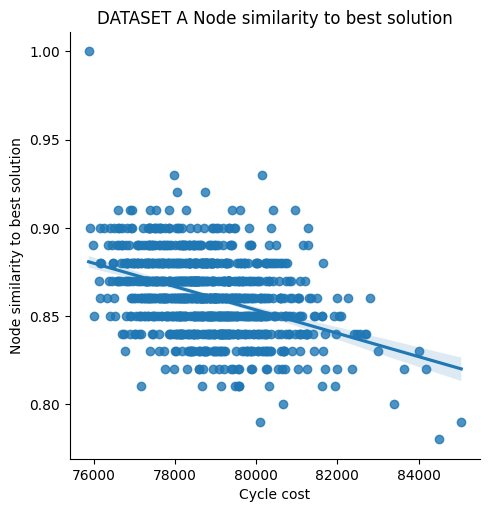

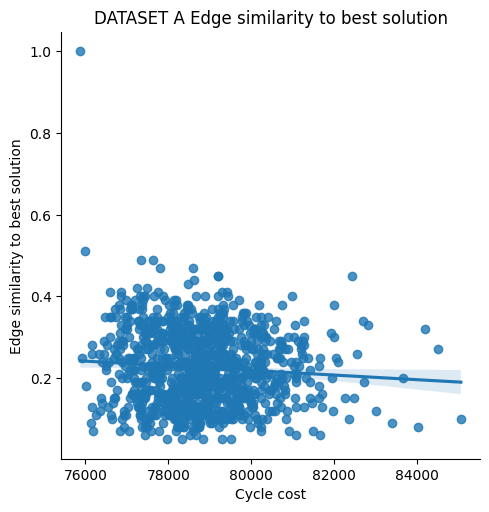

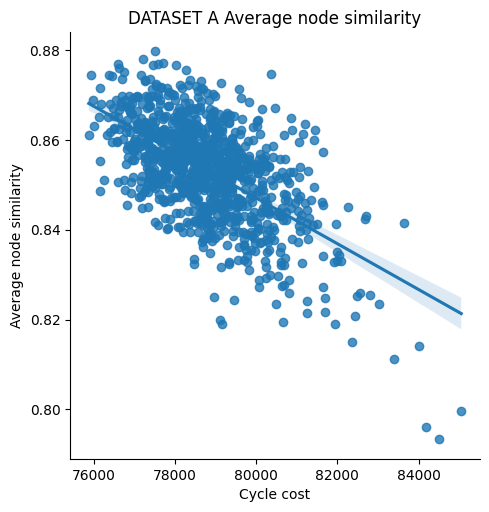

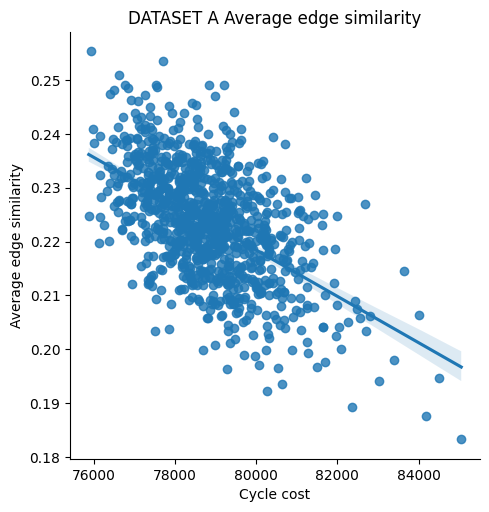

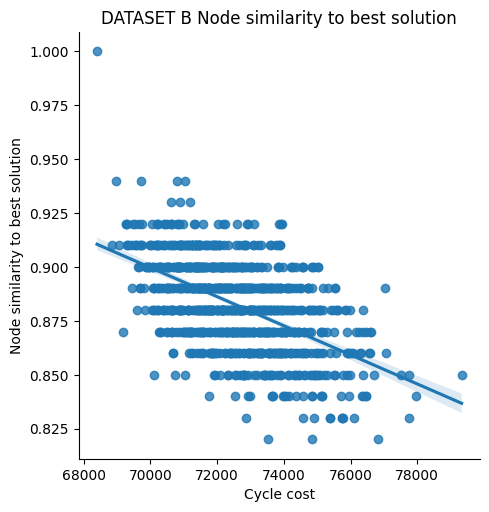

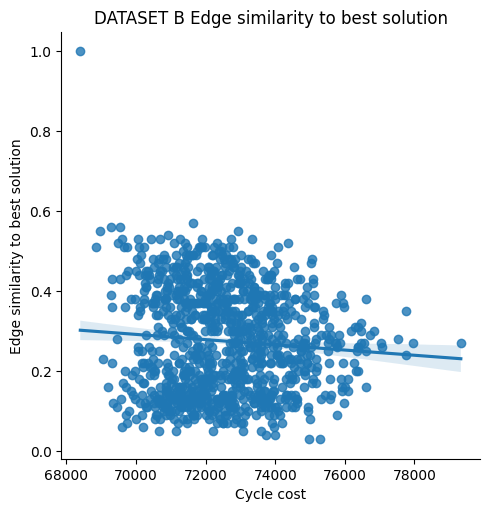

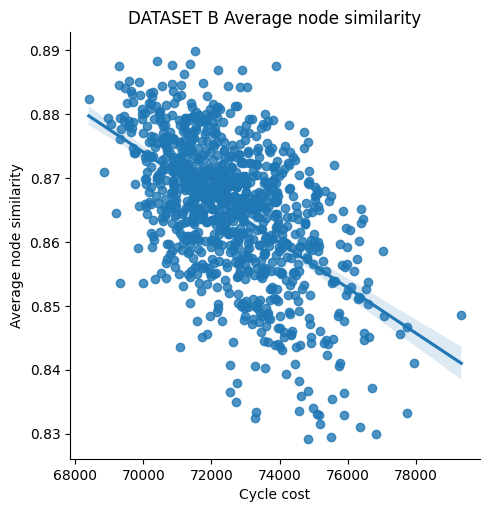

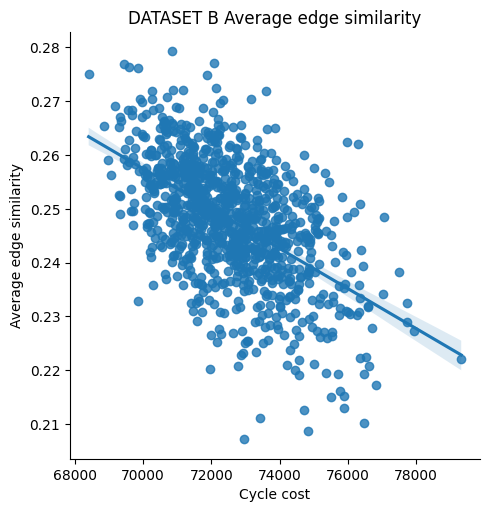

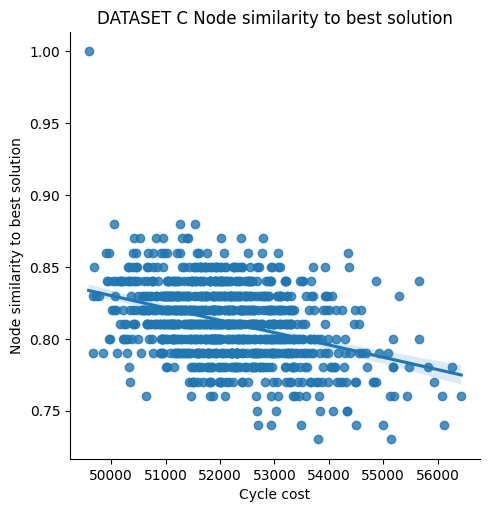

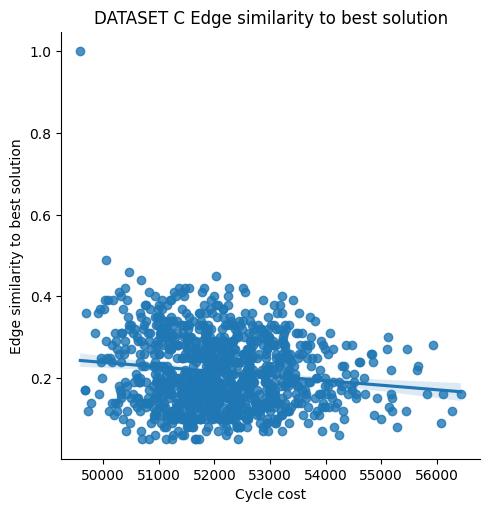

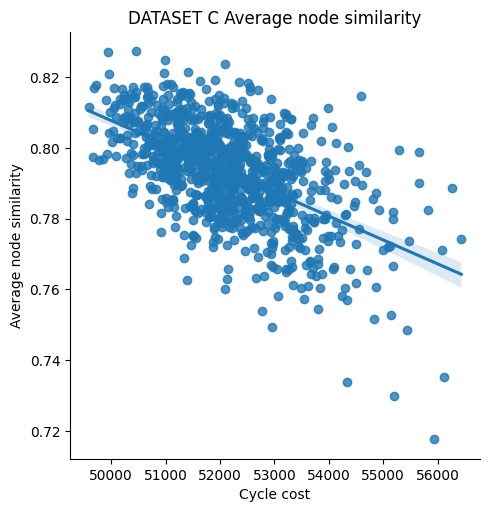

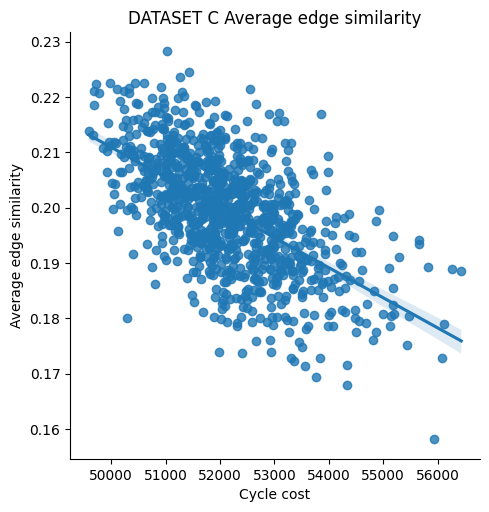

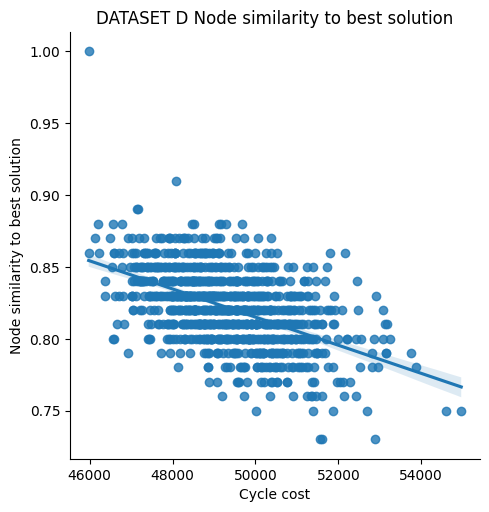

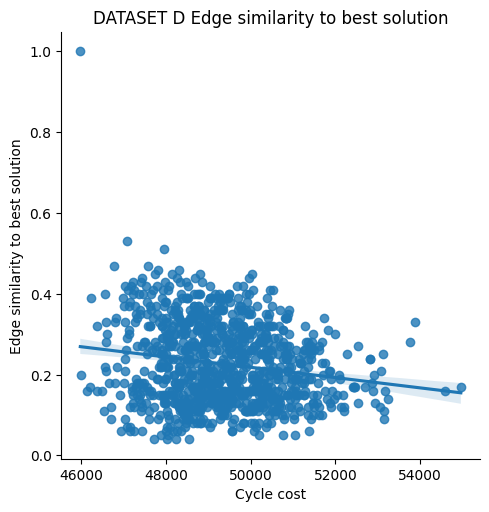

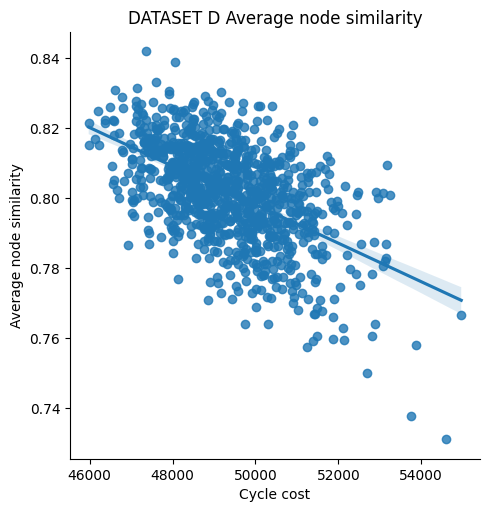

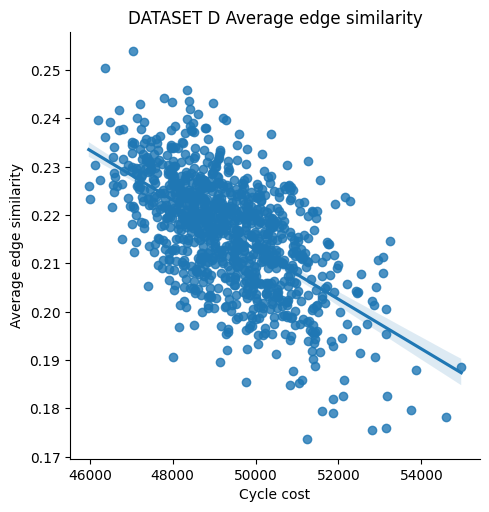

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
i = 0
for key in results_dict.keys():
    df = pd.DataFrame()
    df["Cycle cost"] = [i[1] for i in results_dict[key]]
    df["y_node_best"] = [i[2][0] for i in results_dict[key]]
    df["y_edge_best"] = [i[2][1] for i in results_dict[key]]
    df["y_node_avg"] = [i[2][2] for i in results_dict[key]]
    df["y_edge_avg"] = [i[2][3] for i in results_dict[key]]
    print(key + " Coefficients")
    print(np.corrcoef(df["Cycle cost"], df["y_node_best"])[0, 1])
    print(np.corrcoef(df["Cycle cost"], df["y_edge_best"])[0, 1])
    print(np.corrcoef(df["Cycle cost"], df["y_node_avg"])[0, 1])
    print(np.corrcoef(df["Cycle cost"], df["y_edge_avg"])[0, 1])
    
    plt.rcParams['figure.figsize'] = [4, 4]
    sns.lmplot(data=df, x="Cycle cost", y="y_node_best", palette="viridis")
    plt.title(key + " Node similarity to best solution")
    plt.ylabel("Node similarity to best solution")
    plt.savefig(r'Visualizations\GC\GC' + str(i) + '.png', bbox_inches='tight')
    i += 1
    sns.lmplot(data=df, x="Cycle cost", y="y_edge_best", palette="viridis")
    plt.title(key + " Edge similarity to best solution")
    plt.ylabel("Edge similarity to best solution")
    plt.savefig(r'Visualizations\GC\GC' + str(i) + '.png', bbox_inches='tight')
    i += 1
    sns.lmplot(data=df, x="Cycle cost", y="y_node_avg", palette="viridis")
    plt.title(key + " Average node similarity")
    plt.ylabel("Average node similarity")
    plt.savefig(r'Visualizations\GC\GC' + str(i) + '.png', bbox_inches='tight')
    i += 1
    sns.lmplot(data=df, x="Cycle cost", y="y_edge_avg", palette="viridis")
    plt.title(key + " Average edge similarity")
    plt.ylabel("Average edge similarity")
    plt.savefig(r'Visualizations\GC\GC' + str(i) + '.png', bbox_inches='tight')
    i += 1